# Credit Card Fraud Detection

### What is Fraud
Fraud is a billion-dollar business, and according to PWC (2018), it is increasing every year.

#### Some common problems:
- Credit Card Fraud
- Tax Fraud
- Fraud in Supply Chains, Retail networks, Purchase Department
- Fraud in Insurances
- Fraud in Healthcare

### Challenges in Detecting Frauds
Information technology, business reengineering, reorganization or downsizing may weaken or eliminate control, while new information systems may present additional opportunities to commit fraud.

#### Traditional programming techniques
- Frequency between tries from same IP or computer
- Registered customer's location like country, postcode or address
- 3D code in payment

#### Machine Learning techniques
One of the common technique to detect fraud in credit card payment is Anomoly detection which is a technique used to identify unusual patterns that do not conform to expected behavior, called outliers. 

#### Other usages of Anomoly Detection:
- Manufactoring
- Data Center 
- Airplane engine

### Some common machine learning-based approaches for Anomaly Detection

- Density-Based Anomaly Detection (example: k-NN, LOF)
- Clustering-Based Anomaly Detection
- Support Vector Machine-Based Anomaly Detection
- Isolation Forest Anomaly Detection Algorithm


### Outlier vs Anamoly
Outlier: a value that you predictably find in your data that indicates your model does not work properly

Anomaly: a value that against all odds you find in your data that indicates your model does work properly

### Dataset
https://www.kaggle.com/mlg-ulb/creditcardfraud

Dataset is transformed Principal Component Analysis (PCA) which is commonly used:
- Dimensionality reduction algorithm
- Speed-up Machine Learning algorithms

#### Observation
- some features (V1, V2, V3, ... ,V28) transformed to PCA and Time, Amount features not transformed.
- target is Class (1-Fraud, 0-NonFraud)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('../data/creditcard.csv', sep=',')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().values.any()

False

In [7]:
df_fraud = df[df['Class']==1]
df_fraud.shape

(492, 31)

In [8]:
df_nonFraud = df[df['Class']==0]
df_nonFraud.shape

(284315, 31)

***Note: This dataset does not have any null values, highly unbalanced***

### Anomoly Detection vs Supervised learning

Text(0.5,0,'Class')

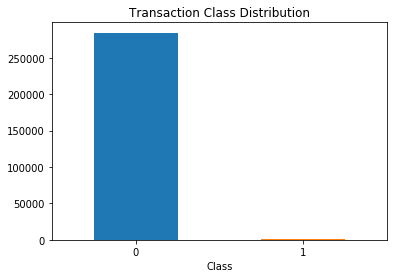

In [15]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ['0','1'])
plt.xlabel("Class")

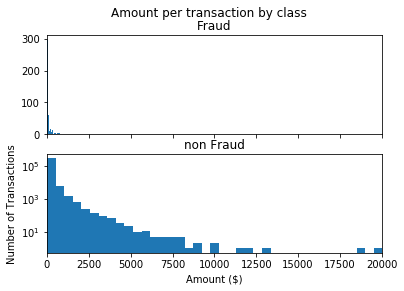

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(df_fraud.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(df_nonFraud.Amount, bins = bins)
ax2.set_title('Non Fraud')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

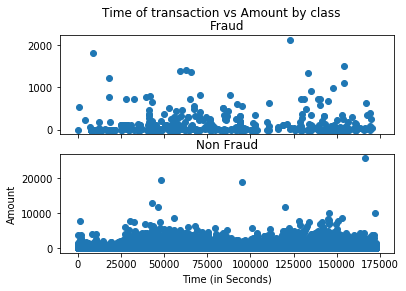

In [25]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(df_fraud.Time, df_fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(df_nonFraud.Time, df_nonFraud.Amount)
ax2.set_title('Non Fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [19]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
x = df.loc[:, features].values

In [20]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf.head(5)

,principal component 1,principal component 2
0,1.359711,0.072561
1,-1.191828,-0.265600
2,1.358423,1.341697
3,0.966348,0.185423
4,1.158304,-0.876917


In [12]:
finalDf = pd.concat([principalDf, df[['Time','Amount','Class']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Time,Amount,Class
0,1.359778,0.072665,0.0,149.62,0
1,-1.191816,-0.265790,0.0,2.69,0
2,1.358416,1.340404,1.0,378.66,0
3,0.966305,0.185346,1.0,123.50,0
4,1.158226,-0.877580,2.0,69.99,0


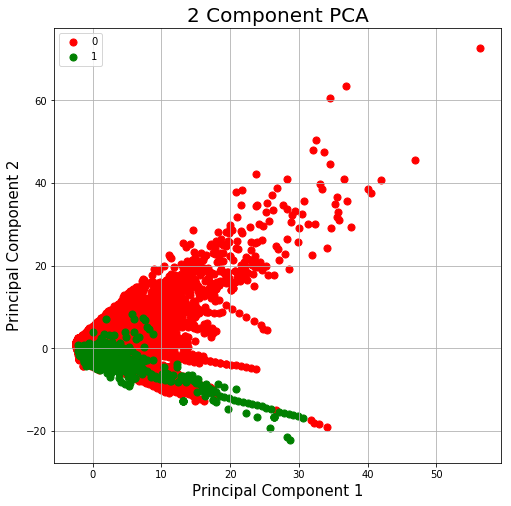

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [14]:
pca.explained_variance_ratio_

array([0.12483757, 0.08872945])

## Reference

https://www.pwc.com/gx/en/forensics/global-economic-crime-and-fraud-survey-2018.pdf
